In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df=pd.read_csv("covid-data.csv")
df["date"]=pd.to_datetime(df["date"])
df.head(3)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


# Analysis of deaths per day for each location

In [3]:
location_death_per_day=pd.DataFrame()

for location, group in df.groupby("location"):
    if location_death_per_day.empty:
        location_death_per_day= group.set_index("date")[["new_deaths"]].rename(columns={"new_deaths": location})
    else:
        location_death_per_day= location_death_per_day.join(group.set_index("date")[["new_deaths"]].rename(columns={"new_deaths": location}))

location_death_per_day.drop(columns="World",inplace=True)
#location_death_per_day.dropna(axis='columns',how='all',inplace=True)
location_death_per_day= location_death_per_day.replace(np.NaN, 0)
location_death_per_day.head()


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [4]:
location_death_per_day.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.0,137.000000,137.0,137.0,137.000000,137.000000,137.000000
mean,1.591241,0.226277,4.364964,0.372263,0.029197,0.0,0.021898,3.291971,0.591241,0.021898,...,0.043796,0.160584,0.094891,0.0,0.072993,0.0,0.0,0.306569,0.051095,0.029197
std,3.677345,0.581488,6.839414,0.767035,0.207988,0.0,0.190477,4.809856,1.074810,0.146887,...,0.205391,0.457512,0.294139,0.0,0.335082,0.0,0.0,1.061090,0.304891,0.168976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,2.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.000000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,32.000000,3.000000,42.000000,4.000000,2.000000,0.0,2.000000,24.000000,5.000000,1.000000,...,1.000000,2.000000,1.000000,0.0,2.000000,0.0,0.0,8.000000,3.000000,1.000000


In [5]:
location_death_per_day.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


Locations:
Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Falkland Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
International
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan

Enter name of location to get an analysis of the number of deaths each day: China


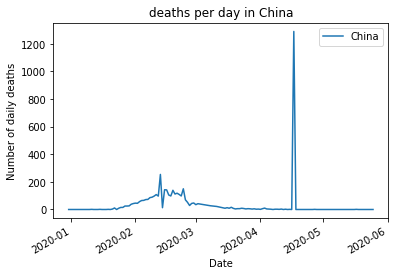

In [24]:
print("Locations:")
for name in location_death_per_day.columns:
    print(name)
location=input("Enter name of location to get an analysis of the number of deaths each day:")
locatoin_df=location_death_per_day[location].to_frame()
locatoin_df.plot()
plt.xlabel("Date")
plt.ylabel("Number of daily deaths")
plt.title(f"deaths per day in {location}")
plt.show()

# Analysis of cases per day for each location

In [20]:
location_cases_per_day=pd.DataFrame()

for location, group in df.groupby("location"):
    if location_cases_per_day.empty:
        location_cases_per_day= group.set_index("date")[["new_cases"]].rename(columns={"new_cases": location})
    else:
        location_cases_per_day= location_cases_per_day.join(group.set_index("date")[["new_cases"]].rename(columns={"new_cases": location}))

location_cases_per_day.drop(columns="World",inplace=True)
#location_cases_per_day.dropna(axis='columns',how='all',inplace=True)
location_cases_per_day= location_cases_per_day.replace(np.NaN, 0)

location_cases_per_day.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-01-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


Locations:
Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Falkland Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
International
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan

Enter name of location to get an analysis of the number of cases each day: China


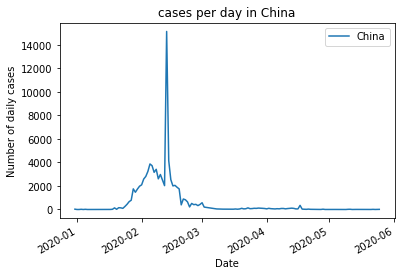

In [21]:
print("Locations:")
for name in location_cases_per_day.columns:
    print(name)
location=input("Enter name of location to get an analysis of the number of cases each day:")
locatoin_df=location_cases_per_day[location].to_frame()
locatoin_df.plot()
plt.xlabel("Date")
plt.ylabel("Number of daily cases")
plt.title(f"cases per day in {location}")
plt.show()

# Analysis of factors that increase the risk of the virus

## median age

Text(0.5, 1.0, 'The effect of median age on the number of dead people')

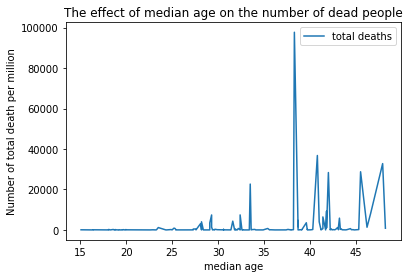

In [103]:
median_age_df=pd.DataFrame()
temp_df=pd.DataFrame()
frames=[]
for location, group in df.groupby("location"):
        if location=='World':
            continue
        median_age_df= group.set_index("location")[["median_age"]].rename(columns={"median_age": "median age"})
        median_age_df.drop_duplicates(inplace=True)
        temp_df=group.set_index("location")[["total_deaths"]]
        temp_df["total deaths"]=max(temp_df["total_deaths"])
        temp_df=temp_df.copy()["total deaths"].to_frame()
        temp_df.drop_duplicates(inplace=True)
        median_age_df=median_age_df.join(temp_df)
        frames.append(median_age_df)
median_age_df.head() 
result=pd.concat(frames)
result.dropna(axis='rows',inplace=True)
result=result.set_index("median age")
result.sort_index(inplace=True)
result.plot()
plt.xlabel("median age")
plt.ylabel("Number of total death per million")
plt.title("The effect of median age on the number of dead people")

## aged 70 older

Text(0.5, 1.0, 'The effect of aged 70 older on the number of dead people')

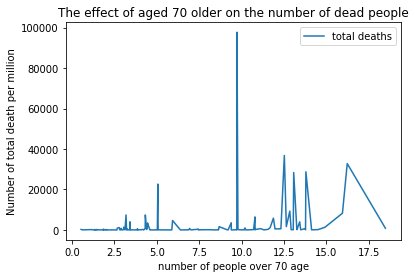

In [101]:
aged_70_older_df=pd.DataFrame()
temp_df=pd.DataFrame()
frames=[]
for location, group in df.groupby("location"):
        if location=='World':
            continue
        aged_70_older_df= group.set_index("location")[["aged_70_older"]].rename(columns={"aged_70_older": "number of people over 70 age"})
        aged_70_older_df.drop_duplicates(inplace=True)
        temp_df=group.set_index("location")[["total_deaths"]]
        temp_df["total deaths"]=max(temp_df["total_deaths"])
        temp_df=temp_df.copy()["total deaths"].to_frame()
        temp_df.drop_duplicates(inplace=True)
        aged_70_older_df=aged_70_older_df.join(temp_df)
        frames.append(aged_70_older_df)

aged_70_older_df.head() 
result=pd.concat(frames)
result.dropna(axis='rows',inplace=True)
result=result.set_index("number of people over 70 age")
result.sort_index(inplace=True)
result.plot()
plt.xlabel("number of people over 70 age")
plt.ylabel("Number of total death per million")
plt.title("The effect of aged 70 older on the number of dead people")